In [1]:
#import requred packages and data to be cleaned
import pandas as pd
import numpy as np
from scipy import stats

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

medical_data = pd.read_csv('medical_raw_data.csv',dtype={'CaseOrder':np.int64})

In [2]:
#create index for dataset
medical_data.rename(columns={'Unnamed: 0':'index'}, inplace=True)
medical_data['index'] = pd.Series(range(0,10000))

In [3]:
#check for nulls in data
medical_data.isnull().any()

index                 False
CaseOrder             False
Customer_id           False
Interaction           False
UID                   False
City                  False
State                 False
County                False
Zip                   False
Lat                   False
Lng                   False
Population            False
Area                  False
Timezone              False
Job                   False
Children               True
Age                    True
Education             False
Employment            False
Income                 True
Marital               False
Gender                False
ReAdmis               False
VitD_levels           False
Doc_visits            False
Full_meals_eaten      False
VitD_supp             False
Soft_drink             True
Initial_admin         False
HighBlood             False
Stroke                False
Complication_risk     False
Overweight             True
Arthritis             False
Diabetes              False
Hyperlipidemia      

In [4]:
#isolate columns with null to prep for cleaning
md_null = medical_data[['Children','Age','Income','Soft_drink','Overweight','Anxiety','Initial_days']]
md_null.head()

,Children,Age,Income,Soft_drink,Overweight,Anxiety,Initial_days
0,1.0,53.0,86575.93,NaN,0.0,1.0,10.585770
1,3.0,51.0,46805.99,No,1.0,NaN,15.129562
2,3.0,53.0,14370.14,No,1.0,NaN,4.772177
3,0.0,78.0,39741.49,No,0.0,NaN,1.714879
4,NaN,22.0,1209.56,Yes,0.0,0.0,1.254807


In [5]:
#fill numerical columns to better perform analysis
medical_data = medical_data.fillna(medical_data.median())

In [6]:
#fill categorical null values
medical_data['Soft_drink'] = medical_data['Soft_drink'].fillna(medical_data['Soft_drink'].mode()[0])

In [7]:
#verify all nulls are filled
medical_data.isnull().any()

index                 False
CaseOrder             False
Customer_id           False
Interaction           False
UID                   False
City                  False
State                 False
County                False
Zip                   False
Lat                   False
Lng                   False
Population            False
Area                  False
Timezone              False
Job                   False
Children              False
Age                   False
Education             False
Employment            False
Income                False
Marital               False
Gender                False
ReAdmis               False
VitD_levels           False
Doc_visits            False
Full_meals_eaten      False
VitD_supp             False
Soft_drink            False
Initial_admin         False
HighBlood             False
Stroke                False
Complication_risk     False
Overweight            False
Arthritis             False
Diabetes              False
Hyperlipidemia      

In [8]:
#check for duplicates that my skew analysis
medical_data.duplicated().any()

False

In [9]:
#perform z score of income variable and create new variable
medical_data['Incomez'] = stats.zscore(medical_data['Income'])

In [10]:
#isolate outlers to new variable
medical_outliers = medical_data.query('Incomez > 3 | Incomez < -3')

In [11]:
medical_outliers

,index,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Incomez
30,30,31,D54890,81693046-dc24-4c84-8d60-dac8a9271438,342d672cea7e6882f63e8fb3e0076cb1,Niotaze,KS,Chautauqua,67355,37.03392,...,13907.967640,3,2,5,3,3,3,3,5,5.120796
36,36,37,X589810,71d5c53b-382f-4bfb-ba89-a5cc8f79b09a,9c7c5a7430801f7e9c6af38d7ba79fd2,Waban,MA,Middlesex,2468,42.32731,...,4204.826360,4,4,5,5,1,3,5,5,3.344178
58,58,59,H786242,d0ee6d98-4a9c-4898-a53a-20ee31b4d641,1b18c3313b8d62a4a4487ca693eb4926,Lynn Haven,FL,Bay,32444,30.23936,...,14397.946210,3,3,3,4,4,5,4,4,3.757416
63,63,64,R430894,7cdcd202-f475-4bbc-8ce2-eef9eb1a38eb,a624688f58099e7d62202790b73110b0,West Bloomfield,MI,Oakland,48322,42.54215,...,11058.380500,4,5,4,5,3,4,4,2,3.593346
77,77,78,G903269,28275f93-aa0c-4311-ac14-2637d45023cf,2d1201d5070a453860cf425de074ccb8,Cynthiana,IN,Posey,47612,38.19303,...,3968.532959,4,4,4,3,5,4,2,4,3.850233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9742,9742,9743,M714824,91573992-4e09-444a-abfa-1fa92f5fb187,eaa46570bf4ec55c7652c48c4982b0c3,Asbury,WV,Greenbrier,24916,37.83127,...,9609.241091,3,3,2,3,4,4,4,4,4.583966
9862,9862,9863,S984639,2f7fda4c-c3b5-4b7b-b0a1-ae51f8149f2e,f2a735c2db8d0c5c824c77dfd94e59fb,Pittsburgh,PA,Allegheny,15260,40.44329,...,9175.406982,5,4,3,4,3,4,5,4,3.290696
9906,9906,9907,E416766,be658e42-e0d5-45ed-a259-4943a4e3c808,8ae790d973df20db7ac404159105c640,Honolulu,HI,Honolulu,96814,21.29398,...,8171.843436,3,3,5,4,3,4,4,4,3.979006
9910,9910,9911,T760129,8deaec35-fb84-4d70-9331-3e3180a6cb19,0d25d0100e92724a5ca84b47578761d8,Saint Clair Shores,MI,Macomb,48081,42.49507,...,22281.115980,4,6,3,6,2,5,6,4,3.226905


In [ ]:
# At this point, due to amount of outliers there must be a convsersation to determine if they must be
# dropped of if the outliers are permissable in the data

In [12]:
#export file to csv
medical_data.to_csv('medical_data_clean.csv', index = False)

In [13]:
#create dataframe to perform PCA

md_pca = medical_data[['Income', 'Age', 'Children','Population','VitD_levels', 
                                 'Doc_visits','Full_meals_eaten','VitD_supp','Initial_days',
                                'TotalCharge','Additional_charges']]

In [14]:
#normalize data 

md_normal = (md_pca - md_pca.mean())/md_pca.std()

In [15]:
#create pca
pca = PCA(n_components=md_pca.shape[1])

In [16]:
pca.fit(md_normal)
medical_pca = pd.DataFrame(pca.transform(md_normal),
columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9', 'PC10','PC11'])

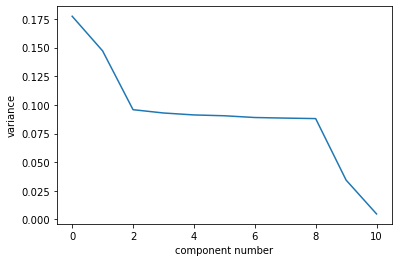

In [17]:
#Scree Plot

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('component number')
plt.ylabel('variance')
plt.show()

In [18]:
#Check eigenvalues with plot
cov_matrix = np.dot(md_normal.T, md_normal) / md_pca.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

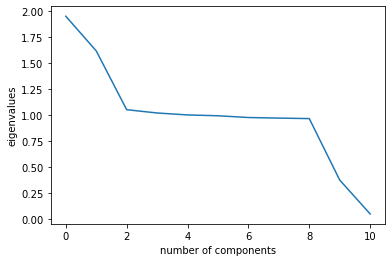

In [19]:
#plot PCA with eigenvalues
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalues')
plt.show()

In [20]:
#output loadings to components
loadings = pd.DataFrame(pca.components_.T,
columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9', 'PC10','PC11'],
index = md_pca.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Income,-0.006752,-0.005251,0.153074,0.616374,0.311451,-0.335112,-0.300179,0.544926,-0.013092,-0.007175,-0.001110
Age,0.082864,0.700979,0.022122,-0.024594,-0.014242,0.004057,-0.015265,0.021947,-0.013605,-0.706598,-0.016378
Children,0.004317,0.011313,0.143266,-0.055997,0.886958,0.143675,0.277871,-0.246596,-0.175343,-0.009117,-0.002495
Population,0.020665,-0.027059,0.503288,0.011591,-0.021264,0.545865,0.154957,0.292515,0.580765,-0.010910,-0.001653
VitD_levels,0.540348,-0.052702,-0.291242,0.267669,-0.069801,0.088197,0.467136,0.136248,-0.052233,-0.022902,0.544146
Doc_visits,-0.005261,0.012735,0.175200,0.626217,-0.179293,0.406584,-0.216578,-0.529823,-0.227726,-0.005734,-0.000223
Full_meals_eaten,-0.009232,0.036620,-0.552477,0.164779,0.232029,-0.009004,-0.227679,-0.277955,0.695041,-0.009578,-0.001451
VitD_supp,0.033956,0.010585,0.424363,0.159845,-0.126951,-0.621369,0.382618,-0.391081,0.302515,-0.005007,-0.001481
Initial_days,0.446482,-0.073483,0.316693,-0.315722,0.093118,-0.098170,-0.587201,-0.162090,0.047716,-0.005801,0.451201
TotalCharge,0.702192,-0.078146,-0.023420,0.003262,0.002286,0.005498,-0.016139,0.002566,-0.012083,0.021002,-0.706662
